### Various Techniques To Treat Data Imbalance Problem 

* To Work on the various techniques to solve the issue of data imbalance, I have a insurance dataset (Binary Classification).
* The dataset consists of various features like - `Age`,`Gender`,`Driving License`, `Vehicle Age`,etc. and Target variable as `Response` - Labels `0` and `1`.

The Techniques covered in this notebook are:
1. **The traditional SMOTE** - `synthetic minority over-sampling technique`
2. **Borderline SMOTE**
3. **ADASYN** - `Adaptive synthetic smapling`

In [2]:
# Import necessery libraries
import pandas as pd 
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

## Load the insurence dataset

In [3]:
df = pd.read_csv(r"C:\Users\bhara\Downloads\machine_learning_projects-main\machine_learning_projects-main\ImbalanceTreatment\insurance.csv")

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [7]:
df.describe(include = 'int')

,id,Age,Driving_License,Previously_Insured,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,0.489182,154.189429,0.163811
std,139527.487326,15.226897,0.043455,0.499884,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,0.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,0.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,1.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,1.000000,299.000000,1.000000


In [8]:
df.Vehicle_Age.value_counts() # Lets clean the feature

1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: Vehicle_Age, dtype: int64

In [7]:
df.Vehicle_Age=df.Vehicle_Age.str.replace('< 1 Year', '0-1 Year')
df.Vehicle_Age=df.Vehicle_Age.str.replace('> 2 Years', '>2 Year')

In [9]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


## Lets check the imbalance in Target Variable

In [11]:
df.Response.value_counts(normalize=True)

0    0.836189
1    0.163811
Name: Response, dtype: float64

### Observation:

* As we can observe that there is a huge imbalance in our dataset
* The label `0` is of 83% and `1` is of 16%
* Due to this imbalance the model that we generate/build will have huge impact of bias.

## Lets Handle the Imbalance data

In [11]:
df1 = df.copy()

In [12]:
X_ohe = df1[['Gender','Vehicle_Damage']]
X_le = df1[['Vehicle_Age']]
Y = df1['Response']
X_num =df1.drop(columns =['Gender','Vehicle_Damage','Vehicle_Age','Response'] )

## NOTE: 
* The your code will throw you an error, because SMOTE technique can be applied only on numerical features not on cateorical.
* If you wish to apply SMOTE then, first encode all your categorical features and the merge the numerical and categorical. Later apply SMOTE

## Data-Preparation of Categorical Variables and Numerical Variables

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num), columns = scaler.get_feature_names_out(X_num.columns), index = X_num.index)
X_num.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,-0.478372,-1.086611,0.043537,-1.472312,1.021874,-1.645878,0.737941,-1.650319
1,-1.556899,0.226856,0.043537,0.120864,-0.978594,0.739424,-1.583081,-0.229169
2,-1.450397,1.803016,0.043537,0.500191,-0.978594,0.300660,0.222158,1.180039
3,-1.053170,-1.086611,0.043537,0.500191,-0.978594,-0.179718,0.737941,-1.017369
4,1.917474,-0.692571,0.043537,1.486443,1.021874,-0.098952,0.737941,0.678457


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_le = encoder.fit_transform(X_le)

In [15]:
X_le = pd.DataFrame(X_le, columns=['Vehicle_Age'])

In [16]:
X_le.head()

,Vehicle_Age
0,0
1,1
2,1
3,0
4,0


In [17]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(drop= 'first', sparse =False)
X_ohe = pd.DataFrame(encode.fit_transform(X_ohe), columns = encode.get_feature_names_out(X_ohe.columns), index = X_ohe.index)

In [18]:
X_ohe.head()

,Gender_Male,Vehicle_Damage_Yes
0,1.0,0.0
1,1.0,1.0
2,0.0,1.0
3,0.0,0.0
4,1.0,0.0


In [19]:
X_categorical = pd.concat([X_ohe,X_le], axis = 1 )

In [20]:
X_categorical

,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age
0,1.0,0.0,0
1,1.0,1.0,1
2,0.0,1.0,1
3,0.0,0.0,0
4,1.0,0.0,0
...,...,...,...
382149,1.0,1.0,0
382150,1.0,0.0,0
382151,1.0,1.0,1
382152,0.0,0.0,0


In [21]:
X_final = pd.concat([X_num,X_categorical], axis = 1)

In [22]:
X_final.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age
0,-0.478372,-1.086611,0.043537,-1.472312,1.021874,-1.645878,0.737941,-1.650319,1.0,0.0,0
1,-1.556899,0.226856,0.043537,0.120864,-0.978594,0.739424,-1.583081,-0.229169,1.0,1.0,1
2,-1.450397,1.803016,0.043537,0.500191,-0.978594,0.300660,0.222158,1.180039,0.0,1.0,1
3,-1.053170,-1.086611,0.043537,0.500191,-0.978594,-0.179718,0.737941,-1.017369,0.0,0.0,0
4,1.917474,-0.692571,0.043537,1.486443,1.021874,-0.098952,0.737941,0.678457,1.0,0.0,0


In [23]:
X_final.dtypes

id                      float64
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Gender_Male             float64
Vehicle_Damage_Yes      float64
Vehicle_Age               int32
dtype: object

In [24]:
## You can observe that now al the features are of numerical, means we can apply SMOTE technique now

## Applying SMOTE 
>  `Synthetic Minority Over-sampling Technique` is a popular technique for oversampling the `minority class` in imbalanced datasets.

**Import SMOTE from `imblearn.over_sampling` , Pass the Input features and the Target variable. Remember to perform `fit_resample`**


In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_re_smote , Y_re_smote = smote.fit_resample(X_final,Y)

## Now lets Check the Imbalance

In [26]:
Y_re_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: Response, dtype: float64

> As you can see that the imbalance as been treated with SMOTE technique where samples has been generated using interpolation from nearest neighbours of minority class

## LIMITATIONS OF SMOTE:

**As SMOTE is a widely used technique/method to handle the issue of class imbalance, It does comes with its own limitations**
1. Oversampling using SMOTE may introduce noise into the data, because it generates synthetic samples using interpolaton of existing minority class samples which results in `unrealistic data points`. Thus may not accuratley represent the `true distribution` of minority class.
2. SMOTE technique does not take into account of `neighbouring majority samples`. As a result, SMOTE may oversample the minority class in regions of the `feature space` that are densely populated by majority class samples, leading to an increased risk of misclassification.

3. The Parameter `K` in SMOTE represents the number of nearest neighbours to consider when generating synthetic data, Now the value of `k` can significantly impact the oversampling results.If k too small, may create samples that are very similar to existing minority class samples, resulting in `overfitting`. if k too large, may introduce excessive diversity and noise into the synthetic samples.

4. SMOTE is in-effective in case of `high-dimensional data`, In high-dimensional feature spaces, the concept of nearest neighbors becomes less meaningful, and SMOTE may struggle to generate meaningful synthetic samples. In such cases go for `Feature Selection` or `Dimensionality Reduction`.

# Borderline SMOTE

* Borderline SMOTE is an extension of traditional SMOTE algorithm, In Borderline it focuses on generating synthetic samples near the decision boundary of the minority class. 

**It adresses some of the limitations of SMOTE, They are:**

* unlike SMOTE which generates samples uniformly across the feature-space,orderline SMOTE Focusses on the data points that are very difficult to classify i.e the samples near the dicision surface.
* It treats the issue of over-generalization by generating synthetic samples only near the decision boundary of the minority class, these samples ditribution is considered to be more representative of the minority class
* Unlike SMOTE, Borderline takes nearest neighbours into account at the decision boundary of minority class 

## Apply 

In [27]:
from imblearn.over_sampling import BorderlineSMOTE
border = BorderlineSMOTE()
X_re_border, Y_re_border  = border.fit_resample(X_final,Y)

## Check 

In [28]:
Y_re_border.value_counts(normalize = True)

0    0.5
1    0.5
Name: Response, dtype: float64

> As you can see that the imbalance as been treated with Borderline SMOTE technique, where samples has been generated near the decision boundary surface by interpolation.


# ADASYN - Adaptive Synthetic Sampling

* ADASYN is also a oversampling technique that generates samples for the minority class, The main aim of ADASYN is to focus on the difficult-to-learn minority class datapoints that are in the oversampling regions in feature space.
* ADASYN calculates density distribution for minority class and generates samples with respect to the overall local density distribution.
### Steps involved:
1. Calculate CIR - Class Imbalance Ratio of majority class samples to minority class samples.
2. For each sample in the minority class
   * Compute the `k` nearest neighbors for both the minority and majority classes.
   * Calculate the density distribution `d` for the sample by measuring the ratio of the number of majority class neighbors      to the total number of neighbors.
   * Compute the target number of synthetic samples to be generated for the current sample, given by the formula:
     `target_samples = CIR * d`
   * Generate synthetic samples by randomly selecting the `k` minority class samples and interpolating them.
   * Add the synthetic samples to the minority class.

## Apply

In [29]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_re_adasyn, Y_re_adasyn  = adasyn.fit_resample(X_final,Y)

## Check

In [30]:
Y_re_adasyn.value_counts(normalize = True)

0    0.501719
1    0.498281
Name: Response, dtype: float64

> As you can see that the imbalance as been treated with ADASYN technique.

## Spliting the data for train and test

### For Traditional SMOTE

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_re_smote,Y_re_smote,random_state=27)

### For Borderline SMOTE

In [32]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_re_border,Y_re_border,random_state=27)

### For ADASYN

In [33]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_re_adasyn,Y_re_adasyn,random_state=27)

# Model Building

## LogisticRegression (Traditional SMOTE)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report
# objection creation
LR = LogisticRegression()

# training the model
LR.fit(X_train,y_train)

LogisticRegression()

0.8347284436320046


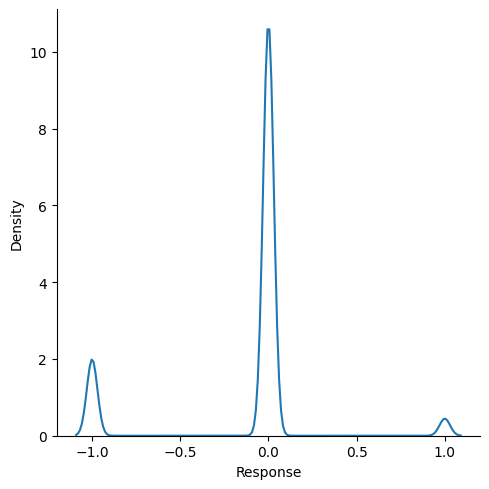

In [35]:
# Performing recidual analysis
y_tr_pred1 = LR.predict(X_train)
print(f1_score(y_train,y_tr_pred1))
residual = y_train-y_tr_pred1
sns.displot(residual,kind = 'kde');

In [36]:
# prediction on unseen data
y_te_pred1 = LR.predict(X_test)
print(f1_score(y_test,y_te_pred1))
print(classification_report(y_test,y_te_pred1))

# lets see the acutal and predicted
temp = pd.DataFrame({'Actual':y_test, 'predicted':y_te_pred1})
temp

0.8357768960028695
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     79904
           1       0.76      0.93      0.84     79873

    accuracy                           0.82    159777
   macro avg       0.83      0.82      0.81    159777
weighted avg       0.83      0.82      0.81    159777



,Actual,predicted
154379,0,0
411996,1,1
472242,1,1
400210,1,1
199018,1,0
...,...,...
464610,1,1
223506,0,1
46999,0,0
249930,0,1


## LogisticRegression (Borderline SMOTE)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report
# objection creation
LRR = LogisticRegression()

# training the model
LRR.fit(X_train1,y_train1)

LogisticRegression()

0.8439071470290753


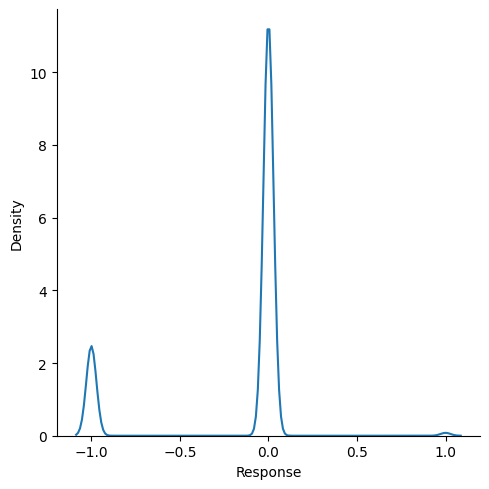

In [38]:
# Performing recidual analysis
y_tr_pred2 = LRR.predict(X_train1)
print(f1_score(y_train1,y_tr_pred2))
residual = y_train1-y_tr_pred2
sns.displot(residual,kind = 'kde');

In [39]:
# prediction on unseen data
y_te_pred2 = LRR.predict(X_test1)
print(f1_score(y_test1,y_te_pred2))
print(classification_report(y_test1,y_te_pred2))

# lets see the acutal and predicted
temp = pd.DataFrame({'Actual':y_test1, 'predicted':y_te_pred2})
temp

0.8444748707032567
              precision    recall  f1-score   support

           0       0.98      0.65      0.78     79904
           1       0.74      0.99      0.84     79873

    accuracy                           0.82    159777
   macro avg       0.86      0.82      0.81    159777
weighted avg       0.86      0.82      0.81    159777



,Actual,predicted
154379,0,0
411996,1,1
472242,1,1
400210,1,1
199018,1,1
...,...,...
464610,1,1
223506,0,1
46999,0,0
249930,0,1


# Logistic Regression (ADASYN)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report
# objection creation
LRRR = LogisticRegression()

# training the model
LRRR.fit(X_train2,y_train2)

LogisticRegression()

0.8364027176202461


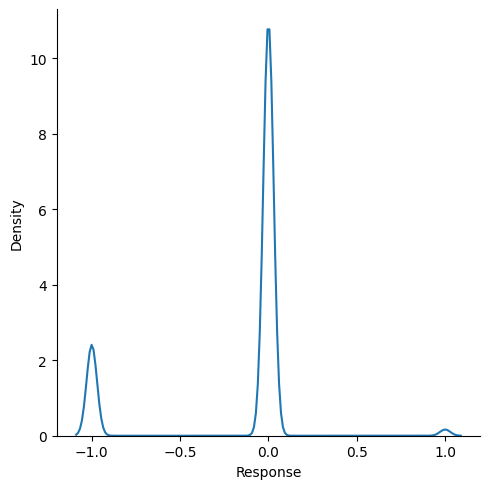

In [41]:
# Performing recidual analysis
y_tr_pred3 = LRRR.predict(X_train2)
print(f1_score(y_train2,y_tr_pred3))
residual = y_train2-y_tr_pred3
sns.displot(residual,kind = 'kde');

In [42]:
# prediction on unseen data
y_te_pred3 = LRRR.predict(X_test2)
print(f1_score(y_test2,y_te_pred3))
print(classification_report(y_test2,y_te_pred3))

# lets see the acutal and predicted
temp = pd.DataFrame({'Actual':y_test2, 'predicted':y_te_pred3})
temp

0.8376781482323151
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     79955
           1       0.73      0.98      0.84     79274

    accuracy                           0.81    159229
   macro avg       0.85      0.81      0.81    159229
weighted avg       0.85      0.81      0.81    159229



,Actual,predicted
22472,0,0
41193,0,0
45577,0,1
444205,1,1
261128,0,0
...,...,...
230395,0,0
300667,0,1
553999,1,1
600244,1,1


# RandomForestClassifier (ADASYN)

In [43]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train2,y_train2)

RandomForestClassifier()

In [44]:
# Performing recidual analysis
y_tr_pre = RF.predict(X_train2)
print(f1_score(y_train2,y_tr_pre))

1.0


In [45]:
# prediction on unseen data
y_te_pre = RF.predict(X_test2)
print(f1_score(y_test2,y_te_pre))
print(classification_report(y_test2,y_te_pre))

# lets see the acutal and predicted
temp = pd.DataFrame({'Actual':y_test2, 'predicted':y_te_pre})
temp

0.9311232166655407
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     79955
           1       0.91      0.96      0.93     79274

    accuracy                           0.93    159229
   macro avg       0.93      0.93      0.93    159229
weighted avg       0.93      0.93      0.93    159229



,Actual,predicted
22472,0,0
41193,0,0
45577,0,0
444205,1,1
261128,0,0
...,...,...
230395,0,0
300667,0,1
553999,1,1
600244,1,1
